In [1]:
import cv2
from PIL import Image
import numpy as np
import sys
import os
import csv
import glob
import pandas as pd
import openslide 
import matplotlib.pyplot as plt

In [2]:
wsi_path="E:/workspace_medical iamging/code/Test_WSI/"

In [3]:
def resize_img(image):
    width = int(image.shape[1] * 2)
    height = int(image.shape[0]* 2)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized

In [4]:
def crop_region(slide_loadpath):
    
    level = 2
    
    slide_list = os.listdir(slide_loadpath)
#     annotation_list = os.listdir(slide_list)
    
#     resize_cropped_regions = []
#     resize_cropped_masks = []

    patch_id=0
    
    for slide_file in slide_list:
        
        wsi = os.path.join(slide_loadpath, slide_file)
    
        with openslide.open_slide(wsi) as slide:
            width, height = (slide.level_dimensions[level])
#             width, height = (slide)

            wsi_BGR = np.array(slide.read_region((0, 0), level, (width, height))) #int(height/2-1200)
            plt.imshow(wsi_BGR)
            print(wsi_BGR.shape)
#             wsi_RGB = cv2.cvtColor(wsi_BGR, cv2.COLOR_BGR2RGB)
    
#         slide_name = os.path.splitext(slide_file)
        
#         file_name = os.path.join(slide_name[0] + '_labels' + '.png')
            
#         if file_name in annotation_list:

#             print(file_name)
            
#             region_image_path = os.path.join(region_loadpath, file_name)
            
#             region_image = cv2.imread(region_image_path, 0)
#             region_binary = cv2.threshold(region_image, 0, 255, cv2.THRESH_BINARY)[1].astype('uint8')
#             region_resize = resize_img2(region_binary)
#             label_object, n_output, n_stats, n_centroids = cv2.connectedComponentsWithStats(region_resize, connectivity=8)
    
#             annotation_image_path = os.path.join(annotation_loadpath, file_name)
        
#             mask_image = cv2.imread(annotation_image_path, 0)
#             mask_binary = cv2.threshold(mask_image, 0, 255, cv2.THRESH_BINARY)[1].astype('uint8')
#             mask_resize = resize_img2(mask_binary)
    
#             for i in range(1, label_object):
            
#                 extension = '.bmp'
                
#                 print(i)
        
#                 for_contour = (n_output==i).astype('uint8')
        
#                 Contours, imgContours = cv2.findContours(for_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
#                 for contour in Contours:
#                     [X, Y, W, H] = cv2.boundingRect(contour)
    
#                     ##increase bounding box size if required
#                     new_x, new_y = int(X - (W * 0)), int(Y - (H * 0))
#                     new_w, new_h = int(W + (W * (0 + 0))), int(H + (H * (0 + 0)))
        
#                 cropped_region = wsi_BGR[new_y:new_y+new_h, new_x:new_x+new_w]
#                 cropped_mask = mask_resize[new_y:new_y+new_h, new_x:new_x+new_w]
    
#                 resize_cropped_region = cv2.resize(cropped_region, (1024, 1024), interpolation = cv2.INTER_AREA)
#                 resize_cropped_mask = cv2.resize(cropped_mask, (1024, 1024), interpolation = cv2.INTER_AREA)
    
# #                 resize_cropped_regions.append(resize_cropped_region)
# #                 resize_cropped_masks.append(resize_cropped_mask)
            
#                 tissue = np.array(resize_cropped_region)
#                 tissue = Image.fromarray(tissue)
#                 tissue.save(save_tissue+slide_name[0]+"_p"+str(patch_id)+extension,"bmp",quality=100) #Image
                
#                 mask = np.array(resize_cropped_mask)
#                 mask = Image.fromarray(mask)
#                 mask.save(save_annotation+slide_name[0]+"_p"+str(patch_id)+extension,"bmp",quality=100) #Image
                
#                 patch_id +=1
#         else:
            
#             pass
    
#     return resize_cropped_regions, resize_cropped_masks

(856, 2860, 4)


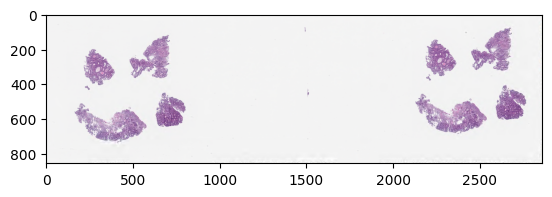

In [5]:
crop_region(wsi_path)

In [4]:
def crop_region(wsi_path, region_img, mask_img):
    cropped_img=[]
    cropped_mask=[]
    level = 1

    with openslide.open_slide(wsi_path) as slide:
        width, height = (slide.level_dimensions[level])

        wsi_BGR = np.array(slide.read_region((0, 0), level, (width, height))) #int(height/2-1200)
        wsi_RGB = cv2.cvtColor(wsi_BGR, cv2.COLOR_BGR2RGB)
    
#      region_image_path = os.path.join(region_loadpath, file_name)
#     annotation_image_path = os.path.join(annotation_loadpath, file_name)
    
#     region_image_path = os.path.join(region_img, file_name)   
    region_image = cv2.imread(region_img, 0)
    region_binary = cv2.threshold(region_image, 0, 255, cv2.THRESH_BINARY)[1].astype('uint8')
    region_resize = resize_img(region_binary)

    mask_image = cv2.imread(mask_img, 0)
    mask_binary = cv2.threshold(mask_image, 0, 255, cv2.THRESH_BINARY)[1].astype('uint8')
    mask_resize = resize_img(mask_binary)

    
    Contours, imgContours = cv2.findContours(region_resize, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
#     print(Contours)
    
    for contour in Contours:
        [X, Y, W, H] = cv2.boundingRect(contour)
    
        ##increase bounding box size if required
        new_x, new_y = int(X - (W * 0)), int(Y - (H * 0))
        new_w, new_h = int(W + (W * (0 + 0))), int(H + (H * (0 + 0)))
        
    cropped_region = wsi_RGB[new_y:new_y+new_h, new_x:new_x+new_w]
    cropped_mask = mask_resize[new_y:new_y+new_h, new_x:new_x+new_w]

#     cropped_img.append(resize_cropped_region)
    
    
    resize_cropped_region = cv2.resize(cropped_region, (1024, 1024), interpolation = cv2.INTER_AREA)
    resize_cropped_mask = cv2.resize(cropped_mask, (1024, 1024), interpolation = cv2.INTER_AREA)
    
    cropped_img = np.array(resize_cropped_region)
    cropped_img_1 = Image.fromarray(cropped_img)
    
    mask = np.array(resize_cropped_mask)
    mask_1 = Image.fromarray(mask)

    
#     cropped_img.append(resize_cropped_region)
#     cropped_mask.append(resize_cropped_mask)
    
    return cropped_img_1, mask_1

In [125]:
mask_path="E:/Medical Imaging/Gastric_all_hospital_data/Bundangcha/Pro2/PD_PCC/Mask/"
ROI_path="E:/Medical Imaging/Gastric_all_hospital_data/Bundangcha/Pro2/PD_PCC/ROI/"
WSI_path="E:/Medical Imaging/Gastric_all_hospital_data/Bundangcha/Slides/"

In [126]:
mask_path_1=[]
ROI_path_1=[]
WSI_path_1=[]

for directory_path in glob.glob(WSI_path):
#     label_1=directory_path.split("\\")[-1]
#     print(label_1)
    for img_path in glob.glob(os.path.join(directory_path, "*.svs")):
    
        WSI_path_1.append(img_path)

In [127]:
for directory_path in glob.glob(ROI_path):
#     label_1=directory_path.split("\\")[-1]
#     print(label_1)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         img=cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         region = np.invert(img)
    
        ROI_path_1.append(img_path)
        

In [128]:
for directory_path in glob.glob(mask_path):
#     label_1=directory_path.split("\\")[-1]
#     print(label_1)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         img=cv2.imread(img_path)
        mask_path_1.append(img_path)

In [121]:
for (i,j,k) in zip(WSI_path_1, ROI_path_1, mask_path_1):
    
    resize_cropped_region,resize_cropped_mask=crop_region(i,j,k)
    

    
        
# for (a, b, c) in zip(num, color, value)
    
#     resize_cropped_region, resize_cropped_mask=crop_region(i,j,k)

In [122]:
resize_cropped_region=np.array(resize_cropped_region)
resize_cropped_mask=np.array(resize_cropped_mask)

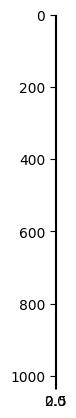

In [123]:
plt.imshow(resize_cropped_region[2])